In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [16]:
advertise = pd.read_csv('advertising.csv')
advertise

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [17]:
X = advertise[['TV','Radio','Newspaper']].values
TV = advertise[['TV']].values
Radio = advertise[['Radio']].values
Newspaper = advertise[['Newspaper']].values
Sales = advertise[['Sales']].values

TV_train,TV_test,Sales_train,Sales_test = train_test_split(TV,Sales,test_size=0.2,random_state=42)
Radio_train,Radio_test,Sales_train,Sales_test = train_test_split(Radio,Sales,test_size=0.2,random_state=42)
Newspaper_train,Newspaper_test,Sales_train,Sales_test = train_test_split(Newspaper,Sales,test_size=0.2,random_state=42)

TV_train = (TV_train)**0.5

scaler = StandardScaler()
Sales_train = scaler.fit_transform(Sales_train)
Sales_test = scaler.fit_transform(Sales_test)
TV_train = scaler.fit_transform(TV_train)
TV_test = scaler.fit_transform(TV_test)



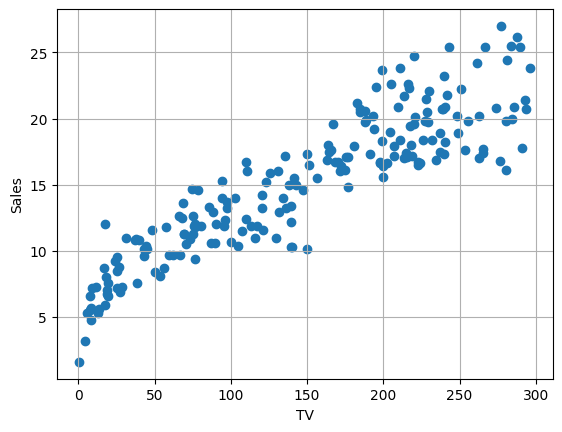

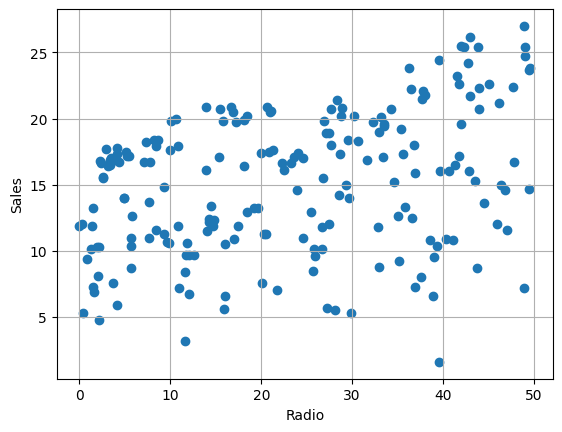

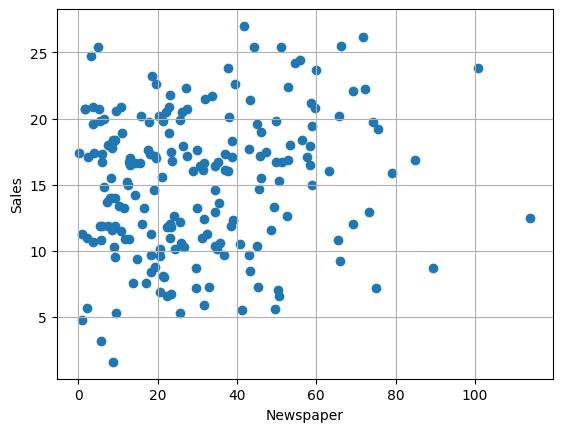

In [18]:
plt.scatter(TV,Sales)
plt.xlabel('TV')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

plt.scatter(Radio,Sales)
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

plt.scatter(Newspaper,Sales)
plt.xlabel('Newspaper')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

In [19]:
lin_reg = LinearRegression()
lin_reg.fit(TV_train,Sales_train)

LinearRegression()

In [20]:
y_pred = lin_reg.predict(TV_test)
R2_score = r2_score(TV_test,y_pred)
R2_score

0.9914979860177072

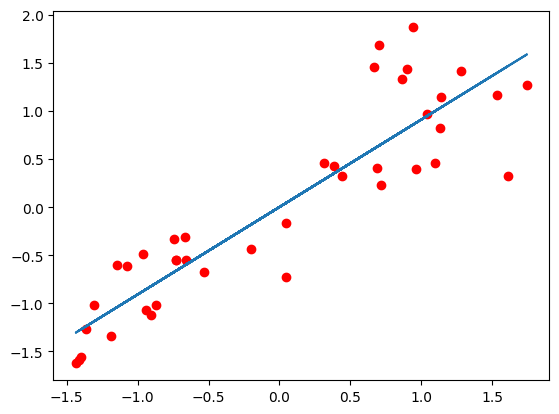

In [21]:
plt.scatter(TV_test,Sales_test,color='red')
plt.plot(TV_test,y_pred)

plt.show()

In [23]:
lin_reg.coef_,lin_reg.intercept_

(array([[0.90779363]]), array([-1.51062234e-16]))